In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [2]:
#Data set loading
df = pd.read_csv('ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
#Shape of the data frame
df.shape

(3755, 11)

In [4]:
#Null Values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
#Data Types
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [6]:
#Data set Describe
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [7]:
df =df.drop(['salary','salary_currency'], axis = 1)
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [8]:
a = {}
for column in df.columns:
    unique_values = df[column].unique()
    a[column] = unique_values.tolist()
print(a)

{'work_year': [2023, 2022, 2020, 2021], 'experience_level': ['SE', 'MI', 'EN', 'EX'], 'employment_type': ['FT', 'CT', 'FL', 'PT'], 'job_title': ['Principal Data Scientist', 'ML Engineer', 'Data Scientist', 'Applied Scientist', 'Data Analyst', 'Data Modeler', 'Research Engineer', 'Analytics Engineer', 'Business Intelligence Engineer', 'Machine Learning Engineer', 'Data Strategist', 'Data Engineer', 'Computer Vision Engineer', 'Data Quality Analyst', 'Compliance Data Analyst', 'Data Architect', 'Applied Machine Learning Engineer', 'AI Developer', 'Research Scientist', 'Data Analytics Manager', 'Business Data Analyst', 'Applied Data Scientist', 'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer', 'Head of Data', 'Data Science Manager', 'Data Manager', 'Machine Learning Researcher', 'Big Data Engineer', 'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer', 'Director of Data Science', 'Machine Learning Scientist', 'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technici

In [9]:
print("Total Unique Job Titles:", len(df['job_title'].unique()))
print(df['job_title'].unique())

Total Unique Job Titles: 93
['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data Scientist' 'Cloud Database Engineer' 'Financial Data Analyst'
 'Data Infrastructure Eng

In [10]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

#for label encoding, which converts Each unique category in the original labels -  
#is assigned a unique numeric value in the encoded labels.

le = LabelEncoder()
df['experience_level'] = le.fit_transform(df.experience_level)
df['employment_type'] = le.fit_transform(df.employment_type)
df['job_title'] = le.fit_transform(df.job_title)
df['employee_residence'] = le.fit_transform(df.employee_residence)
df['company_location'] = le.fit_transform(df.company_location)
df['company_size'] = le.fit_transform(df.company_size)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,85847,26,100,25,0
1,2023,2,0,66,30000,75,100,70,2
2,2023,2,0,66,25500,75,100,70,2
3,2023,3,2,47,175000,11,100,12,1
4,2023,3,2,47,120000,11,100,12,1


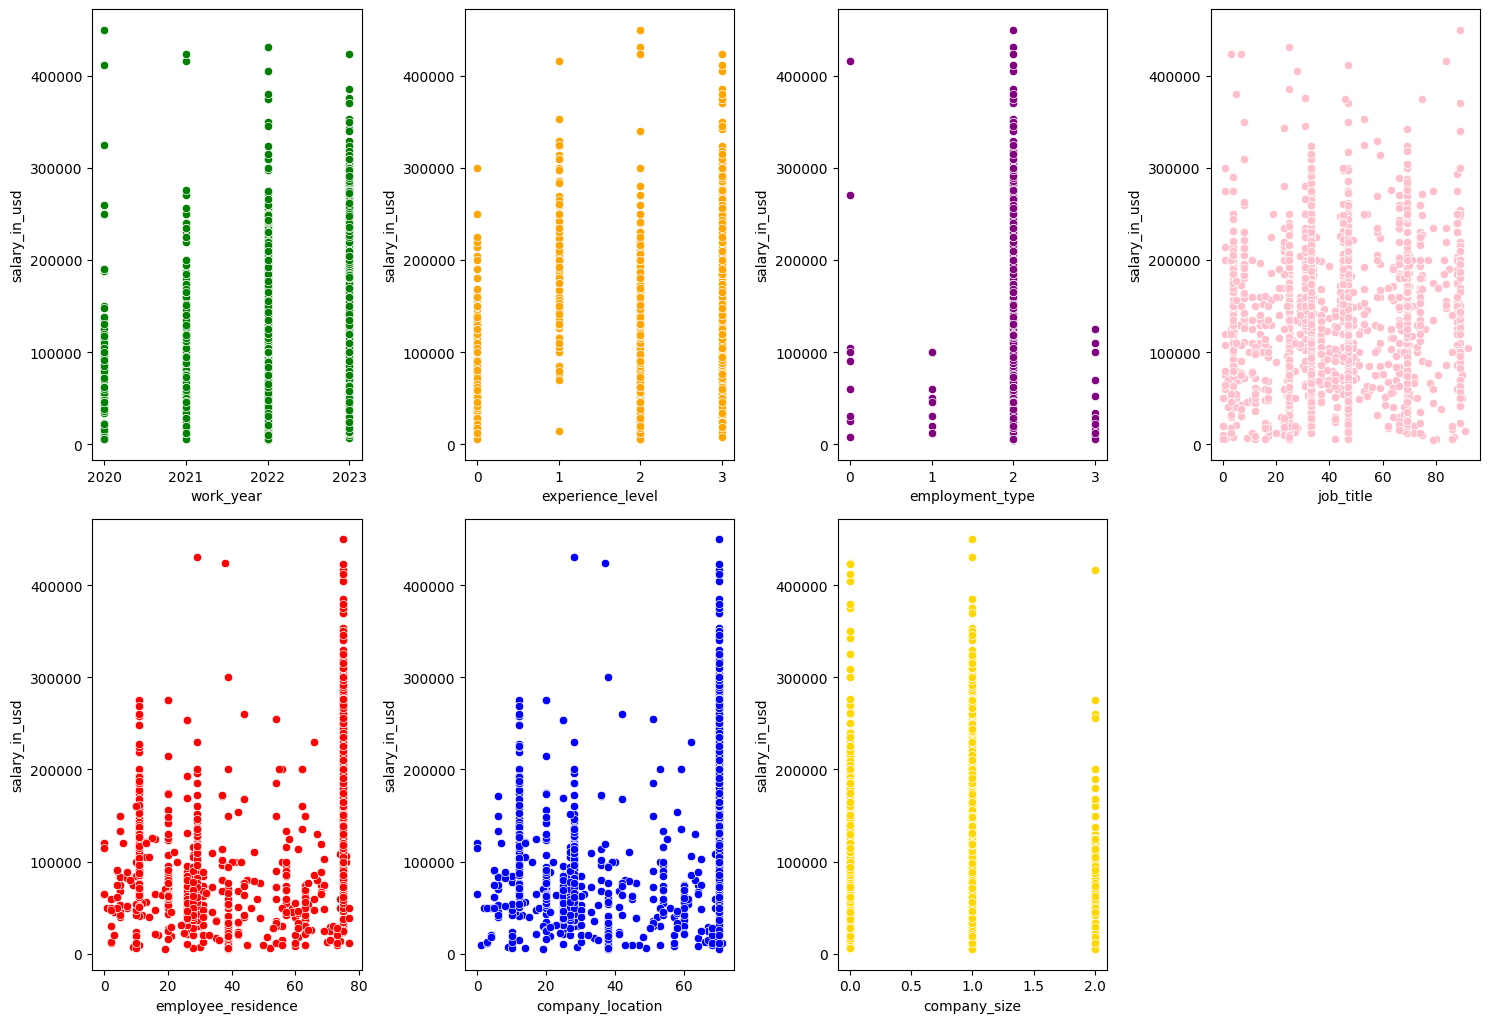

In [11]:
x_variables = [ 'work_year','experience_level' , 'employment_type' , 'job_title','employee_residence','company_location','company_size']
y_variable = 'salary_in_usd'

colors = ['green', 'orange', 'purple', 'pink','red','blue','gold']

num_plots = len(x_variables)
num_rows = (num_plots - 1) // 3 + 1
num_cols = min(num_plots, 4)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows*5))

for i, (x_var, color) in enumerate(zip(x_variables, colors)):
    ax = axes[i // num_cols, i % num_cols]
    sns.scatterplot(x=x_var, y=y_variable, data=df, color=color, ax=ax)
    ax.set_xlabel(x_var)

# Hide empty subplots
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j // num_cols, j % num_cols])

# Adjust spacing
plt.tight_layout()

# Show the plots
plt.show()

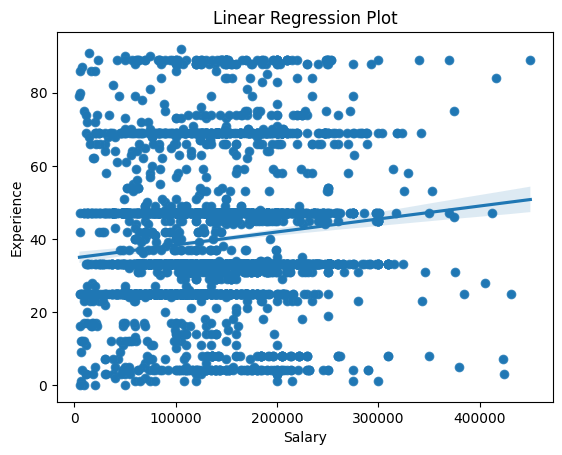

In [12]:
# Plot the scatter plot
sns.scatterplot(data=df, x='salary_in_usd', y='job_title')

# Fit and plot the linear regression line
sns.regplot(data=df, x='salary_in_usd', y='job_title')

# Set labels and title
plt.xlabel('Salary')
plt.ylabel('Experience')
plt.title('Linear Regression Plot')

# Display the plot
plt.show()

In [13]:
x = df.drop('salary_in_usd' , axis=1)
y = df.salary_in_usd
print(x.head())
print(y.head())

   work_year  experience_level  employment_type  job_title   
0       2023                 3                2         84  \
1       2023                 2                0         66   
2       2023                 2                0         66   
3       2023                 3                2         47   
4       2023                 3                2         47   

   employee_residence  remote_ratio  company_location  company_size  
0                  26           100                25             0  
1                  75           100                70             2  
2                  75           100                70             2  
3                  11           100                12             1  
4                  11           100                12             1  
0     85847
1     30000
2     25500
3    175000
4    120000
Name: salary_in_usd, dtype: int64


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, x_train)  # Create a linear regression model
result = model.fit()  # Train the model on the training data

In [15]:
print(x_train.head())
print(y_train.head())

      work_year  experience_level  employment_type  job_title   
2238       2022                 3                2         33  \
485        2023                 2                2         89   
2177       2022                 3                2         25   
3305       2022                 3                2         33   
1769       2023                 3                2         33   

      employee_residence  remote_ratio  company_location  company_size  
2238                  26             0                25             1  
485                   75           100                70             1  
2177                  75             0                70             1  
3305                  75           100                70             1  
1769                  75           100                70             1  
2238     36773
485     151800
2177    100000
3305    156600
1769    175000
Name: salary_in_usd, dtype: int64


In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          salary_in_usd   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              2479.
Date:                Fri, 23 Jun 2023   Prob (F-statistic):                        0.00
Time:                        15:28:39   Log-Likelihood:                         -37051.
No. Observations:                3004   AIC:                                  7.412e+04
Df Residuals:                    2996   BIC:                                  7.417e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
work_year             -2.8064      7.683     -0.365      0.715     -17.871      12.258
experience_level    1.602e+04   1156.044     13.857      0.000    1.38e+04    1.83e+04
employment_type     3793.4302   7084.700      0.535      0.592   -1.01e+04    1.77e+04
job_title            488.1665     54.635      8.935      0.000     381.040     595.293
employee_residence   689.9787    166.082      4.154      0.000     364.333    1015.624
remote_ratio          -9.7979     20.812     -0.471      0.638     -50.604      31.009
company_location     579.3260    182.457      3.175      0.002     221.572     937.080
company_size       -4677.2643   2581.010     -1.812      0.070   -9737.995     383.466
==============================================================================
Omnibus:                      592.979   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1480.760
Skew:                           1.076   Prob(JB):                         0.00
Kurtosis:                       5.683   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
y_pred = result.predict(x_test)

# Calculate R-squared score
r2_score = r2_score(y_test, y_pred)

print("R-squared score:", r2_score)

# Calculate residual sum of squares (RSS)
rss = np.sum((y_test - y_pred) ** 2)

# Calculate total sum of squares (TSS)
tss = np.sum((y_test - np.mean(y_test)) ** 2)

# Calculate the number of samples (n) and features (p)
n = x_test.shape[0]
p = x_test.shape[1]

# Calculate R-squared score
r2 = 1 - rss / tss

# Calculate adjusted R-squared score
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-Square score:",adj_r2)

R-squared score: 0.2701160667471987
Adjusted R-Square score: 0.2622466981946079


In [18]:
x2 = df.drop(['salary_in_usd', 'employment_type','remote_ratio','company_size'], axis=1)
y2 = df['salary_in_usd']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

model2 = sm.OLS(y2_train, x2_train)  # Create a linear regression model
result2 = model2.fit()  # Train the model on the training data
y2_pred = result2.predict(x2_test)

from sklearn.metrics import r2_score
# Calculate R-squared score
r2_score_val = r2_score(y2_test, y2_pred)
print("R-squared score:", r2_score_val)

# Calculate residual sum of squares (RSS)
rss2 = np.sum((y2_test - y2_pred) ** 2)

# Calculate total sum of squares (TSS)
tss2 = np.sum((y2_test - np.mean(y2_test)) ** 2)

# Calculate the number of samples (n) and features (p)
n = x2_test.shape[0]
p = x2_test.shape[1]

# Calculate R-squared score
r2 = 1 - rss2 / tss2

# Calculate adjusted R-squared score
adj1_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-Square score:",adj1_r2)

R-squared score: 0.2681509876212984
Adjusted R-Square score: 0.2632392492831863


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#To build a plot to choose optimistic k-value
k_values = [i for i in range (1,20)]
scores = []

scaler = StandardScaler()
x = scaler.fit_transform(x)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, y, cv=5)
    scores.append(np.mean(score))

C:\Users\patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.

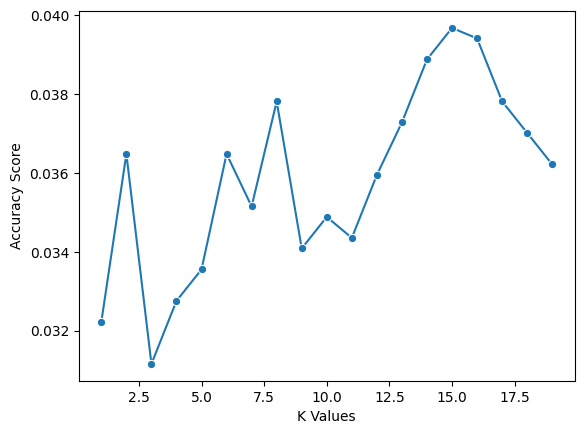

In [20]:
#Plot
sns.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score");

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

#Accuracies of model with K-value ranging from 1-20
accuracy = []
for n_neighbors in range(1,20):
    knn=KNeighborsClassifier(n_neighbors)
    knn.fit(x_train,y_train)
    score = accuracy_score(y_test,knn.predict(x_test))
    accuracy.append(score)
accuracy

[0.03994673768308921,
 0.03994673768308921,
 0.03861517976031957,
 0.043941411451398134,
 0.0426098535286285,
 0.03994673768308921,
 0.045272969374167776,
 0.045272969374167776,
 0.047936085219707054,
 0.0492676431424767,
 0.0426098535286285,
 0.043941411451398134,
 0.04660452729693742,
 0.0426098535286285,
 0.0426098535286285,
 0.03861517976031957,
 0.03861517976031957,
 0.05193075898801598,
 0.047936085219707054]

In [24]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [25]:
treemodel = DecisionTreeClassifier(max_depth=3)
treemodel.fit(x_train,y_train)
plt.figure(figsize=(25, 10))

plot = tree.plot_tree(treemodel, feature_names=x.columns.values.tolist(), class_names=['0', '1'], filled=True, rounded=True, fontsize=14)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 2500x1000 with 0 Axes>

In [28]:
model = treemodel.fit(x_train,y_train)
#predeicted the response for the test data
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.03861517976031957


In [30]:
#Models RMSE
from sklearn.metrics import mean_squared_error

preds = model.predict(x_test)
rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 57081.549


In [31]:
rfclass = RandomForestClassifier(n_estimators=20, random_state=0)
rfclass.fit(x_train,y_train)
rfypred=rfclass.predict(x_test)

In [32]:
print(rfclass.score(x_test,y_test))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

0.05725699067909454
Accuracy: 0.03861517976031957


In [ ]:
gbclass= GradientBoostingClassifier(random_state=0)
gbclass.fit(x_train,y_train)
gbypred=gbclass.predict(x_test)

In [ ]:
gbclass.score(x_test,y_test)